In [1]:
import networkx as nx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle
from extract import extract
from tqdm import tqdm
import os
from skimage import io
from skimage.morphology import skeletonize
import sknw
import random

C:\App\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [8]:
image = io.imread("../notebooks/squelette.tif")

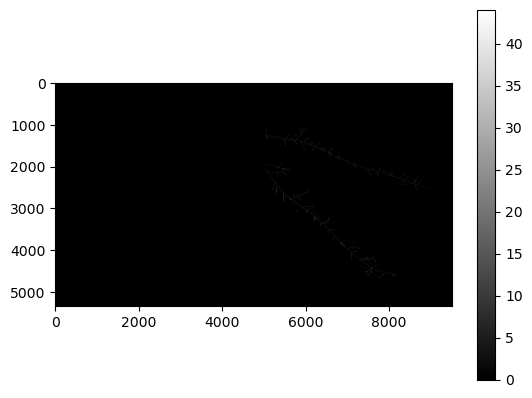

In [10]:
img = image[:, :]

plt.imshow(img, cmap="grey")
plt.colorbar()

plt.show()

In [13]:
skeleton = skeletonize(img)

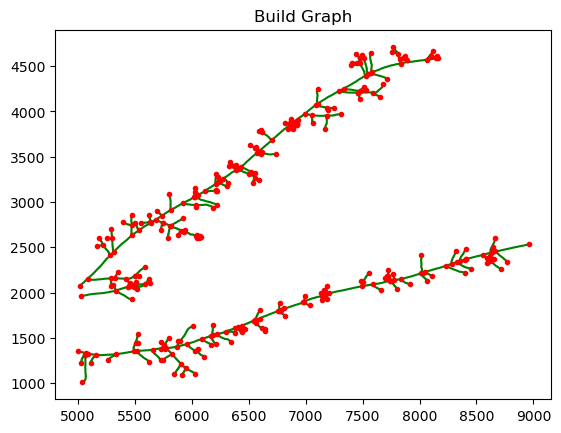

<Figure size 640x480 with 0 Axes>

In [16]:
# build graph from skeleton
graph = sknw.build_sknw(skeleton)

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

# title and show
plt.title('Build Graph')
plt.show()
plt.savefig("graph_1")

# Choisir et cropper les images

In [14]:
# Rhizophagus mesure 3
image_path = []

base_path = "../data"
sp_target = "rhizophagus"
mesure_target = "3"

sp_path = os.path.join(base_path, sp_target)

if os.path.isdir(sp_path):
    for boite in os.listdir(sp_path):
        mesure_path = os.path.join(sp_path, boite, mesure_target)
        if os.path.isdir(mesure_path):
            for photo in os.listdir(mesure_path):
                if photo.endswith(".JPG"):
                    path = os.path.join(mesure_path, photo)
                    image_path.append(path)

# Sélection aléatoire de 5 fichiers
selected_images_rhizo = random.sample(image_path, min(5, len(image_path)))

print(selected_images_rhizo)

['../data\\rhizophagus\\06\\3\\R06_30_06_P09.JPG', '../data\\rhizophagus\\08\\3\\R08_23_06_P09.JPG', '../data\\rhizophagus\\08\\3\\R08_23_06_P02.JPG', '../data\\rhizophagus\\25\\3\\R25_07_07_P20.JPG', '../data\\rhizophagus\\04\\3\\R04_14_07_P14.JPG']


In [15]:
# Gigaspora mesure 5
image_path = []

base_path = "../data"
sp_target = "gigaspora"
mesure_target = "5"

sp_path = os.path.join(base_path, sp_target)

if os.path.isdir(sp_path):
    for boite in os.listdir(sp_path):
        mesure_path = os.path.join(sp_path, boite, mesure_target)
        if os.path.isdir(mesure_path):
            for photo in os.listdir(mesure_path):
                if photo.endswith(".JPG"):
                    path = os.path.join(mesure_path, photo)
                    image_path.append(path)

# Sélection aléatoire de 5 fichiers
selected_images_giga = random.sample(image_path, min(5, len(image_path)))

print(selected_images_giga)

['../data\\gigaspora\\34\\5\\G09_07_07_P13.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P12.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P02.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P16.JPG', '../data\\gigaspora\\34\\5\\G09_07_07_P04.JPG']


In [16]:
from PIL import Image

output_dir = "../data/cropped"
os.makedirs(output_dir, exist_ok=True)

crop_width = 4752
crop_height = 2672

for input_path in selected_images_rhizo:
    with Image.open(input_path) as img:
        cropped = img.crop((0, 0, crop_width, crop_height))

        filename = os.path.basename(input_path)
        output_path = os.path.join(output_dir, filename)

        cropped.save(output_path)
        print(f"Image cropée : {output_path}")

Image cropée : ../data/cropped\R06_30_06_P09.JPG
Image cropée : ../data/cropped\R08_23_06_P09.JPG
Image cropée : ../data/cropped\R08_23_06_P02.JPG
Image cropée : ../data/cropped\R25_07_07_P20.JPG
Image cropée : ../data/cropped\R04_14_07_P14.JPG


In [17]:
output_dir = "../data/cropped"
os.makedirs(output_dir, exist_ok=True)

crop_width = 4752
crop_height = 2672

for input_path in selected_images_giga:
    with Image.open(input_path) as img:
        cropped = img.crop((0, 0, crop_width, crop_height))
        
        filename = os.path.basename(input_path)
        output_path = os.path.join(output_dir, filename)

        cropped.save(output_path)
        print(f"Image cropée : {output_path}")

Image cropée : ../data/cropped\G09_07_07_P13.JPG
Image cropée : ../data/cropped\G09_07_07_P12.JPG
Image cropée : ../data/cropped\G09_07_07_P02.JPG
Image cropée : ../data/cropped\G09_07_07_P16.JPG
Image cropée : ../data/cropped\G09_07_07_P04.JPG


# Afficher les images dans Napari

In [2]:
import napari

In [3]:
cropped_dir = "../data/cropped"

viewer = napari.Viewer()

for filename in os.listdir(cropped_dir):
    if filename.endswith(".JPG"):
        path = os.path.join(cropped_dir, filename)

        image = io.imread(path)
        img = image[:, :, 1]

        viewer.add_image(img, name=filename)

        print(f"Affichage de : {path}")

napari.run()

Affichage de : ../data/cropped\G09_07_07_P02.JPG
Affichage de : ../data/cropped\G09_07_07_P04.JPG
Affichage de : ../data/cropped\G09_07_07_P12.JPG
Affichage de : ../data/cropped\G09_07_07_P13.JPG
Affichage de : ../data/cropped\G09_07_07_P16.JPG
Affichage de : ../data/cropped\R04_14_07_P14.JPG
Affichage de : ../data/cropped\R06_30_06_P09.JPG
Affichage de : ../data/cropped\R08_23_06_P02.JPG
Affichage de : ../data/cropped\R08_23_06_P09.JPG
Affichage de : ../data/cropped\R25_07_07_P20.JPG


In [4]:
image = io.imread("../data/cropped/R06_3006_09_sk.tif")

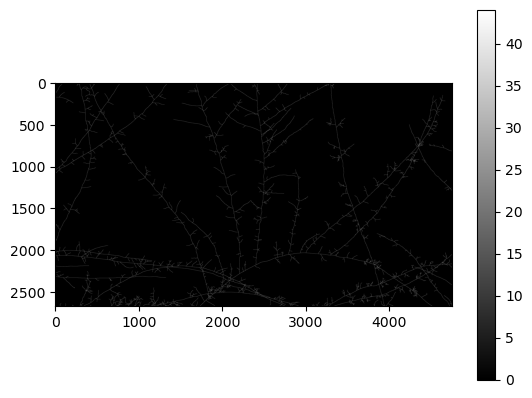

In [5]:
img = image[:, :]

plt.imshow(img, cmap="grey")
plt.colorbar()

plt.show()

In [6]:
skeleton = skeletonize(img)

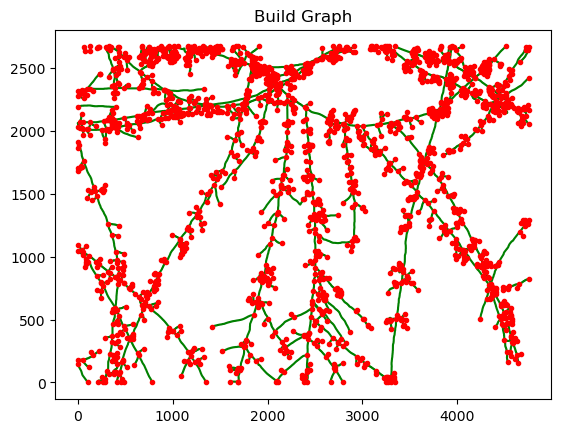

In [7]:
# build graph from skeleton
graph = sknw.build_sknw(skeleton)

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

# title and show
plt.title('Build Graph')
plt.show()